In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

Model Performance Metrics:
                       Model            MSE        R2        MAE        RMSE
0           LinearRegression  197369.752312  0.804919  64.245089  444.263157
1                      Lasso  198899.230493  0.803407  48.358088  445.981200
2                      Ridge  197280.702209  0.805007  64.159996  444.162923
3        KNeighborsRegressor   94582.632589  0.906514  19.531660  307.542896
4      DecisionTreeRegressor  131285.167550  0.870237  19.799739  362.332951
5  GradientBoostingRegressor  115297.645159  0.886039  25.813862  339.555069


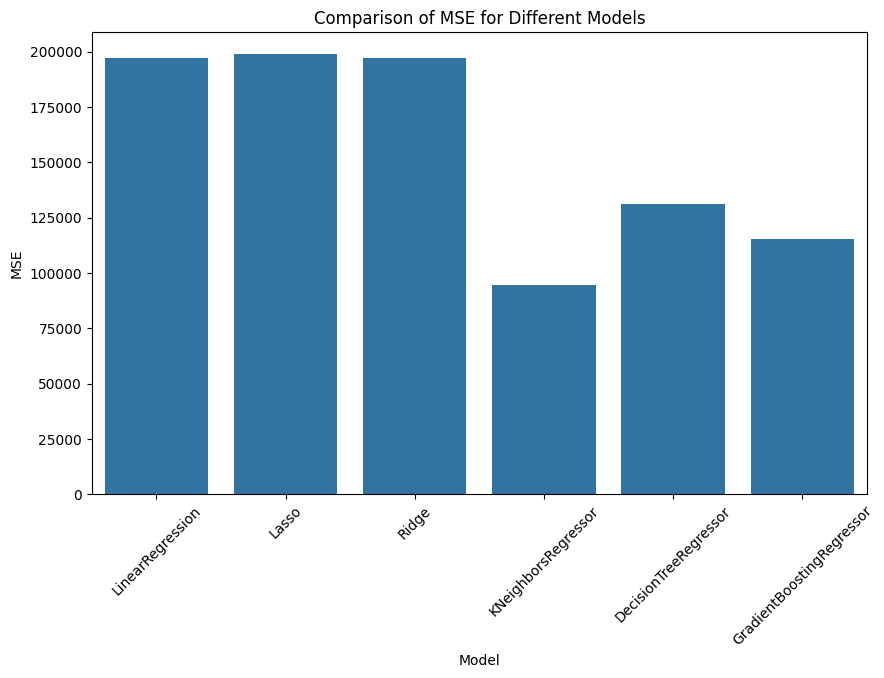

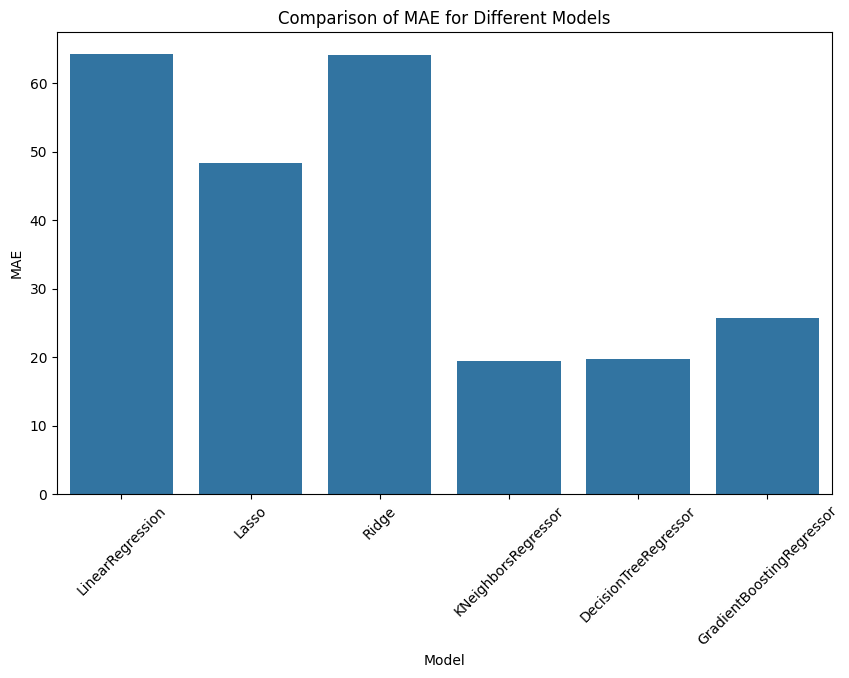

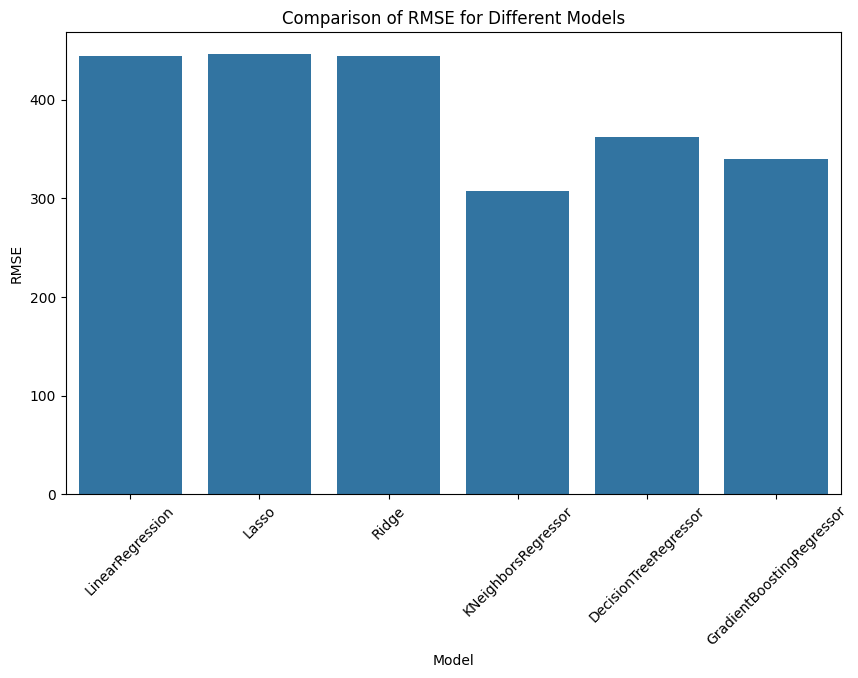

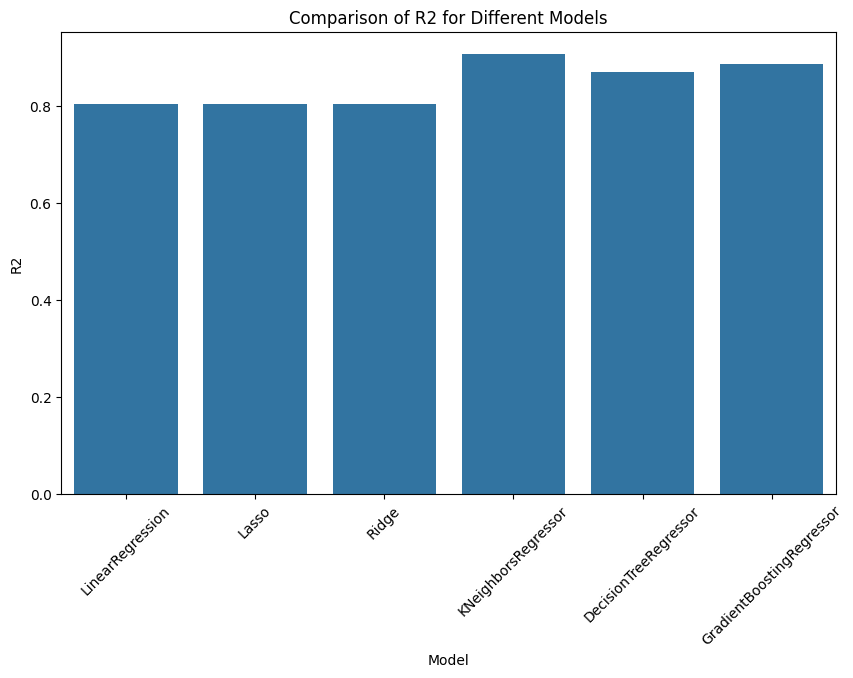

In [3]:
# Load the dataset
data = pd.read_csv('../data/Crop_Data.csv')

# Define the column names for categorical and numerical data
categorical_columns = ['State', 'District', 'Season', 'Crop']
numerical_columns = ['Year', 'Fertilizer', 'Pesticide', 'Avg_rainfall', 'Temperature', 'Area']

# Create transformers
ohe = OneHotEncoder(drop='first')
minmax = MinMaxScaler()

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', ohe, categorical_columns),
        ('Standardization', minmax, numerical_columns)
    ],
    remainder='passthrough'
)

# Separate features and target
X = data.drop(columns=['Yield', 'Production'])
y = data['Yield']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform both training and test data
X_train_dummy = preprocessor.transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

# Store the results
results = []

for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mse)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    })
    

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a table format
print("Model Performance Metrics:")
print(results_df)

# Plotting the metrics
metrics = ['MSE', 'MAE', 'RMSE','R2']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Comparison of {metric} for Different Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

In [4]:
## Model Selection : DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
# dtr.predict(X_test_dummy)

DecisionTreeRegressor()

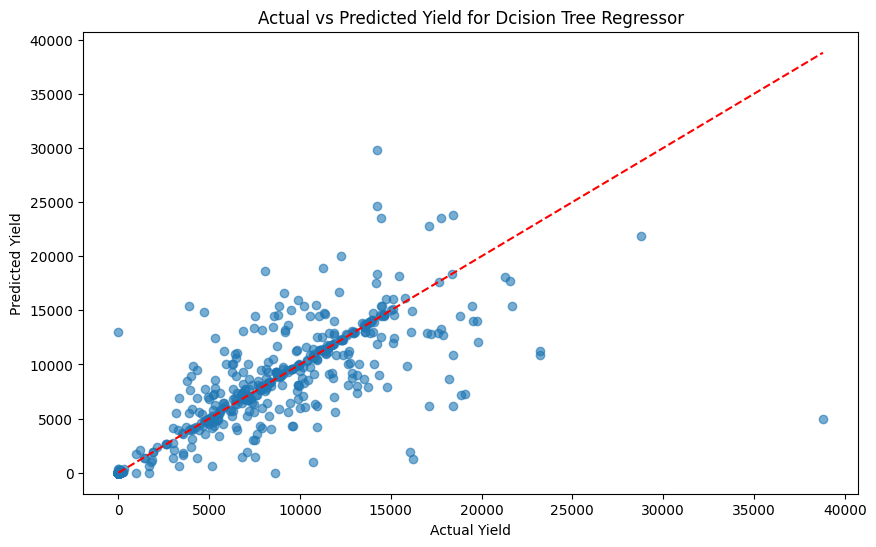

In [5]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
y_pred = dtr.predict(X_test_dummy)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title(f'Actual vs Predicted Yield for Dcision Tree Regressor')
plt.show()

In [6]:
# Predictive System

def prediction(State,District,Year,Season,Crop,Fertilizer,Pesticide,Avg_rainfall,Temperature,Area):

     # Create a DataFrame with the correct column names
    feature_dict = {
        'State': [State],
        'District': [District],
        'Year': [Year],
        'Season': [Season],
        'Crop': [Crop],
        'Fertilizer': [Fertilizer],
        'Pesticide': [Pesticide],
        'Avg_rainfall': [Avg_rainfall],
        'Temperature': [Temperature],
        'Area': [Area]
    }
    features = pd.DataFrame(feature_dict)
    
    # Preprocessing of user input
    transformed_features = preprocessor.transform(features)

    predicted_value = dtr.predict(transformed_features).reshape(1,-1)
    return predicted_value[0]

In [17]:
State ='Uttar Pradesh'
District = 'Allahabad'
Year = 2024
Season = 'Rabi'
Crop = 'Wheat'
Fertilizer = 148.1669
Pesticide = 0.27
Avg_rainfall = 54.58
Temperature	= 26.2
Area = 208249.0
#Production = 486357.0

result = prediction(State,District,Year,Season,Crop,Fertilizer,Pesticide,Avg_rainfall,Temperature,Area)
result 

array([3.55])

In [15]:
result 

array([3.55])

In [18]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))